# Vaidya spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.6.beta7, Release Date: 2022-04-02'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We introduce coordinates $(v,r,\theta,\varphi)$ analogous to the **ingoing null Eddington-Finkelstein coordinates** in Schwarzschild spacetime, i.e. such that $v$ is constant along ingoing radial null geodesics:

In [4]:
XN.<v,r,th,ph> = M.chart(r'v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
XN

Chart (M, (v, r, th, ph))

In [5]:
XN.coord_range()

v: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

### Metric tensor

The metric tensor corresponding to the Vaidya solution is:

In [6]:
m = function('m')
g = M.metric()
g[0,0] = -(1 - 2*m(v)/r)
g[0,1] = 1
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m(v)/r - 1) dv⊗dv + dv⊗dr + dr⊗dv + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [7]:
g.inverse().display()

inv_g = ∂/∂v⊗∂/∂r + ∂/∂r⊗∂/∂v + (r - 2*m(v))/r ∂/∂r⊗∂/∂r + r^(-2) ∂/∂th⊗∂/∂th + 1/(r^2*sin(th)^2) ∂/∂ph⊗∂/∂ph

In [8]:
g.inverse()[:]

[                0                 1                 0                 0]
[                1    (r - 2*m(v))/r                 0                 0]
[                0                 0            r^(-2)                 0]
[                0                 0                 0 1/(r^2*sin(th)^2)]

### Curvature

The Ricci tensor is

In [9]:
Ric = g.ricci()
Ric.display()

Ric(g) = 2*d(m)/dv/r^2 dv⊗dv

It has zero trace, i.e. the Ricci scalar vanishes:

In [10]:
g.ricci_scalar().expr()

0

The Riemann tensor:

In [11]:
Riem = g.riemann()
Riem.display_comp(only_nonredundant=True)

Riem(g)^v_v,v,r = 2*m(v)/r^3 
Riem(g)^v_th,v,th = -m(v)/r 
Riem(g)^v_ph,v,ph = -m(v)*sin(th)^2/r 
Riem(g)^r_v,v,r = 2*(r*m(v) - 2*m(v)^2)/r^4 
Riem(g)^r_r,v,r = -2*m(v)/r^3 
Riem(g)^r_th,v,th = d(m)/dv 
Riem(g)^r_th,r,th = -m(v)/r 
Riem(g)^r_ph,v,ph = sin(th)^2*d(m)/dv 
Riem(g)^r_ph,r,ph = -m(v)*sin(th)^2/r 
Riem(g)^th_v,v,th = -(r^2*d(m)/dv + r*m(v) - 2*m(v)^2)/r^4 
Riem(g)^th_v,r,th = m(v)/r^3 
Riem(g)^th_r,v,th = m(v)/r^3 
Riem(g)^th_ph,th,ph = 2*m(v)*sin(th)^2/r 
Riem(g)^ph_v,v,ph = -(r^2*d(m)/dv + r*m(v) - 2*m(v)^2)/r^4 
Riem(g)^ph_v,r,ph = m(v)/r^3 
Riem(g)^ph_r,v,ph = m(v)/r^3 
Riem(g)^ph_th,th,ph = -2*m(v)/r

The Kretschmann scalar $K = R_{abcd} R^{abcd}$:

In [12]:
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
K.expr()

48*m(v)^2/r^6

### Wave vector $k$

In [13]:
XN.coframe()

Coordinate coframe (M, (dv,dr,dth,dph))

In [14]:
dv = XN.coframe()[0]
dv.display()

dv = dv

In [15]:
k = - dv.up(g)
k.set_name('k')
k.display()

k = -∂/∂r

Check that 𝑘 is a null vector:

In [16]:
g(k, k).expr()

0

Check that $k$ is a geodesic vector field, i.e. fulfils $\nabla_k  k = 0$:

In [17]:
nabla = g.connection()
acc = nabla(k).contract(k)
acc.display()

0

#### Homethetic Killing vector for $m(v) = (m_0/v_0) v$:

In [18]:
xi = M.vector_field(v, r, 0, 0, name='xi', 
                    latex_name=r'\xi')
xi.display()

xi = v ∂/∂v + r ∂/∂r

In [19]:
Lg = g.lie_derivative(xi) - 2*g
Lg.display()

2*(v*d(m)/dv - m(v))/r dv⊗dv

If $m(v)$ is a linear function, the above result is identically zero, showing that 
$\mathcal{L}_{\xi} g = 2 g$ in that case, i.e. that $\xi$ is a homethetic Killing vector. 

### Ingoing Eddington-Finkelstein coordinates $(t,r,\theta,\varphi)$ 

Let us introduce a new chart $(t,r,\theta,\varphi)$ such that the advanced time $t+r$ is $v$: $v = t + r$; this is the 
analog of **ingoing Eddington-Finkelstein (IEF) coordinates** in Schwarzschild spacetime.

In [20]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
X

Chart (M, (t, r, th, ph))

In [21]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

We declare the transition map between the $(t,r,\theta,\varphi)$ and $(v,r,\theta,\varphi)$ coordinates:

In [22]:
X_to_XN = X.transition_map(XN, (t + r, r, th, ph))
X_to_XN.display()

v = r + t
r = r
th = th
ph = ph

In [23]:
X_to_XN.inverse().display()

t = -r + v
r = r
th = th
ph = ph

Expression of the metric tensor in the IEF coordinates:

In [24]:
g.display(X)

g = -(r - 2*m(r + t))/r dt⊗dt + 2*m(r + t)/r dt⊗dr + 2*m(r + t)/r dr⊗dt + (r + 2*m(r + t))/r dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

From now on, we set the IEF chart `X` to be the default one on $M$:

In [25]:
M.set_default_chart(X)
M.set_default_frame(X.frame())

Then `g.display(X)` can be substituted by `g.display()`:

In [26]:
g.display()

g = -(r - 2*m(r + t))/r dt⊗dt + 2*m(r + t)/r dt⊗dr + 2*m(r + t)/r dr⊗dt + (r + 2*m(r + t))/r dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [27]:
g.inverse()[:]

[-(r + 2*m(r + t))/r        2*m(r + t)/r                   0                   0]
[       2*m(r + t)/r  (r - 2*m(r + t))/r                   0                   0]
[                  0                   0              r^(-2)                   0]
[                  0                   0                   0   1/(r^2*sin(th)^2)]

In [28]:
xi.display()

xi = t ∂/∂t + r ∂/∂r

## Einstein equation

The Ricci tensor in terms of the IEF coordinates:

In [29]:
Ric.display()

Ric(g) = 2*d(m)/d(r + t)/r^2 dt⊗dt + 2*d(m)/d(r + t)/r^2 dt⊗dr + 2*d(m)/d(r + t)/r^2 dr⊗dt + 2*d(m)/d(r + t)/r^2 dr⊗dr

The notation $\frac{\partial m}{\partial(r+t)}$ to denote $\frac{\mathrm{d}m}{\mathrm{d}v}$ is quite unfortunate (this shall be improved in a future version). The display of the corresponding symbolic expression is slightly better, $\mathrm{D}_0(m)$ standing for the derivative of function $m$ with respect to its first (index $0$) and unique argument, i.e. $\mathrm{D}_0(m) = \frac{\mathrm{d}m}{\mathrm{d}v}$:

In [30]:
Ric[0,0].expr()

2*D[0](m)(r + t)/r^2

The Ricci scalar is vanishing:

In [31]:
g.ricci_scalar().display()

r(g): M → ℝ
   (v, r, th, ph) ↦ 0
   (t, r, th, ph) ↦ 0

The energy-momentum vector ensuring that the Einstein equation is fulfilled is then:

In [32]:
T = 1/(8*pi)*Ric
T.set_name('T')
T.display()

T = 1/4*d(m)/d(r + t)/(pi*r^2) dt⊗dt + 1/4*d(m)/d(r + t)/(pi*r^2) dt⊗dr + 1/4*d(m)/d(r + t)/(pi*r^2) dr⊗dt + 1/4*d(m)/d(r + t)/(pi*r^2) dr⊗dr

Since $v=t+r$, we have $\mathrm{d}v = \mathrm{d}t + \mathrm{d}r$:

In [33]:
dv.display()

dv = dt + dr

The derivative of the function $m(v)$:

In [34]:
mp(v) = diff(m(v), v)
mp(v)

diff(m(v), v)

In [35]:
T == 1/(4*pi)*mp(t+r)/r^2 * dv*dv

True

The future-directed null vector along the ingoing null geodesics:

In [36]:
k.display()

k = ∂/∂t - ∂/∂r

## Outgoing radial null geodesics

Let us consider the vector field:

In [37]:
l = M.vector_field(1, (r - 2*m(t+r))/(r+2*m(t+r)), 0, 0, 
                   name='l', latex_name=r'\ell')
l.display()

l = ∂/∂t + (r - 2*m(r + t))/(r + 2*m(r + t)) ∂/∂r

It is a null vector:

In [38]:
g(l,l).display()

g(l,l): M → ℝ
   (v, r, th, ph) ↦ 0
   (t, r, th, ph) ↦ 0

Moreover $\ell$ is a pregeodesic vector field, i.e. it obeys $\nabla_\ell \ell = \kappa \ell$:

In [39]:
acc = nabla(l).contract(l)
acc.display()

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2) ∂/∂t + 4*(r*(2*d(m)/d(r + t) + 1)*m(r + t) - r^2*d(m)/d(r + t) - 2*m(r + t)^2)/(r^3 + 6*r^2*m(r + t) + 12*r*m(r + t)^2 + 8*m(r + t)^3) ∂/∂r

In [40]:
kappa = acc[0]/l[0]
kappa 

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [41]:
acc == kappa*l

True

local/var/lib/sage/venv-python3.8/lib/python3.8/site-packages/scipy/integrate/## Integration of the outgoing radial null geodesics

The outgoing radial null geodesics are the field lines of $\ell$; they thus obey to
$$ \frac{\mathrm{d}r}{\mathrm{d}t} = \frac{\ell^r}{\ell^t}$$.
Hence the value of $\frac{\mathrm{d}r}{\mathrm{d}t}$:

In [42]:
drdt = (l[1] / l[0]).expr()
drdt

(r - 2*m(r + t))/(r + 2*m(r + t))

## Choice of function $m(v)$

Let us choose a simple function $m(v)$, based on one of the following smoothstep functions:

In [43]:
S0(x) = x
S1(x) = -2*x^3 + 3*x^2
S2(x) = 6*x^5 - 15*x^4 + 10*x^3

S(x) = S0(x)
#S(x) = S2(x)

In [44]:
m_0 = var('m_0')
v_0 = var('v_0')

h(v) = (1+sgn(v))/2  # the Heaviside function

mS(v) = m_0*(h(v)*h(v_0 - v)*S(v/v_0) + h(v - v_0))
mS(v)

1/4*(v*(sgn(v) + 1)*(sgn(-v + v_0) + 1)/v_0 + 2*sgn(v - v_0) + 2)*m_0

*NB:* we don't use Sage's predefined `heaviside` function, since it is incompatible with SciPy numerical integrators. 

## Case of singularity entirely hidden under the event horizon

We select a numerical value for $v_0$ (in units of $m$):

In [45]:
v0 = 3

In [46]:
m_num(v) = mS(v).subs({m_0: 1, v_0: v0})
m_num(v)

1/12*v*(sgn(v) + 1)*(sgn(-v + 3) + 1) + 1/2*sgn(v - 3) + 1/2

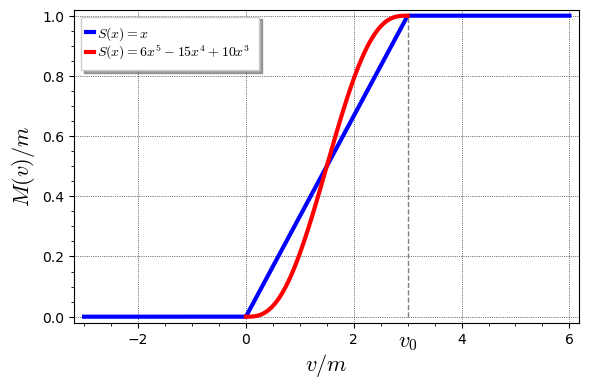

In [47]:
graph = plot(m_num(v), (v, -v0, 2*v0), color='blue', 
             legend_label=r'$S(x) = x$', thickness=3,
             axes_labels=[r'$v/m$', r'$M(v)/m$'],
             frame=True, axes=False, gridlines=True)
graph +=  plot(S2(v/v0) , (v, 0, v0), color='red',
               legend_label=r'$S(x) = 6x^5 - 15x^4 + 10x^3$', 
               thickness=3) 
graph += line([(v0, 0), (v0, 1)], linestyle='--', color='grey')
graph += text(r'$v_0$', (v0, -0.08), color='black', fontsize=16)
graph.set_axes_range(ymin=0)
graph.save("vai_mass_function.pdf")
graph

### Numerical integration of the outgoing radial null geodesics

We plug the function $m(v)$ into the expression of $\frac{\mathrm{d}r}{\mathrm{d}t}$ along
the outgoing radial null geodesics found above:

In [48]:
drdt1 = drdt.substitute_function(m, m_num)
drdt1

-((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) - 6*r + 6*sgn(r + t - 3) + 6)/((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) + 6*r + 6*sgn(r + t - 3) + 6)

and we perform a numerical integration: 

In [49]:
fdrdt = fast_callable(drdt1, vars=[t, r])

In [50]:
from scipy.integrate import ode

def solve_ode(t0, t1, r0=0.001, dt=0.02):
    t0 = RDF(t0)
    t1 = RDF(t1)
    r0 = RDF(r0)
    dt = RDF(dt)
    forward = 1 if t1 > t0 else -1
    rd = ode(solve_ode.rhs)
    rd.set_initial_value(r0, t0)
    rd.set_integrator('dopri5')
    sol = []
    ts = t0
    rs = r0
    while rd.successful() and forward*ts < forward*t1 and rs > 0:
        sol.append((ts, rs))
        ts = rd.t + forward*dt
        rs = RDF(rd.integrate(ts)[0])
    return sol

solve_ode.rhs = fdrdt

Plot parameters:

In [51]:
tmax = v0 + 1.5
ymin = -4
ymax = tmax - 0.5
rmax = 6

Outgoing radial null geodesics from the Minkowski region:

In [52]:
def geod_line(sol):
    return line([(s[1], s[0]) for s in sol], color='green')

def outgeods_from_Mink(t0, tmax, dt0, t0_max=0):
    geods = []
    print('t0 : ', end='')
    while t0 < t0_max:
        sol = solve_ode(t0, tmax, r0=1e-8, dt=0.05)
        print(t0, end=', ')
        geods.append(geod_line(sol))
        t0 += dt0
    return geods

In [53]:
outgeods = outgeods_from_Mink(-10., tmax, 1., t0_max=-3.)

t0 : -10.0000000000000, -9.00000000000000, -8.00000000000000, -7.00000000000000, -6.00000000000000, -5.00000000000000, -4.00000000000000, 

In [54]:
dt0 = 0.5 if S == S0 else 0.49
outgeods += outgeods_from_Mink(-3., tmax, dt0)

t0 : -3.00000000000000, -2.50000000000000, -2.00000000000000, -1.50000000000000, -1.00000000000000, -0.500000000000000, 

Drawing of the radiation region (yellow rays):

In [55]:
def draw_radiation_region(v0, rmax, nl):
    graph = Graphics()
    for i in range(nl+1):
        t0 = float(i)/float(nl)*v0
        graph += line([(0, t0), (rmax, t0 - rmax)], color='yellow')
    return graph

In [56]:
graph = draw_radiation_region(v0, rmax, 20)

Adding the outgoing radial null geodesics:

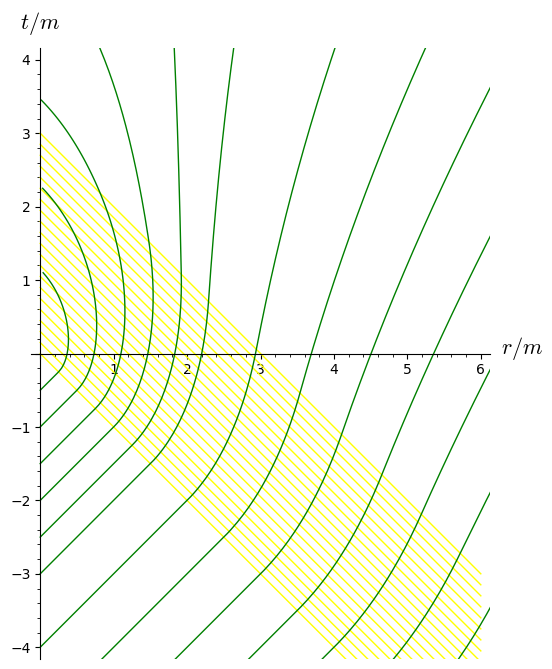

In [57]:
for geod in outgeods:
    graph += geod
show(graph, aspect_ratio=1, xmax=rmax, ymin=ymin, ymax=ymax, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

The ingoing null geodesics:

In [58]:
def ingoing_geods(tmin, tmax, rmax, v0, dt_out, dt_in):
    geods = []
    t0 = tmin
    while t0 < 0:
        geods.append(line([(0, t0), (rmax, t0 - rmax)], color='green',
                          linestyle='--'))
        t0 += dt_out
    t0 = 0
    while t0 <= v0:
        geods.append(line([(0, t0), (rmax, t0 - rmax)], color='green',
                          linestyle='--'))
        t0 += dt_in
    t0 = v0 + dt_out
    while t0 < tmax + rmax:
        geods.append(line([(0, t0), (rmax, t0 - rmax)], color='green',
                          linestyle='--'))
        t0 += dt_out
    return geods

In [59]:
ingeods = ingoing_geods(-6., tmax, rmax, v0, 1., 0.5)
for geod in ingeods:
    graph += geod

#### The curvature singularity (in orange):

In [60]:
def curvature_sing(tmax, nb):
    h = tmax/(nb - 1)
    return line([(0,  h*i) for i in range(nb)], 
                thickness=3, color='darkorange', 
                marker='D', markersize=8)

In [61]:
graph += curvature_sing(tmax, 21)

#### The event horizon (in black):

In [62]:
def event_hor(tmax, tmin=-4.):
    sol = solve_ode(tmax, tmin, r0=2.)
    hor = line([(s[1], s[0]) for s in sol], color='black', thickness=4)
    # Refinement near the horizon birth point:
    t0, r0 = sol[-2][0], sol[-2][1]
    sol = solve_ode(t0, tmin, r0=r0, dt=0.001)
    hor += line([(s[1], s[0]) for s in sol], color='black', thickness=4)
    thb = sol[-1][0]
    dthb = sol[-2][0] - thb 
    print("Coordinate t at the event horizon birth [unit: m]: ")
    print(thb, " +/- ", dthb)
    return hor

In [63]:
graph += event_hor(tmax)

Coordinate t at the event horizon birth [unit: m]: 
-2.600999999999992  +/-  0.0009999999999998899


Check of the determination of $t_{\rm hb}$ by comparison with the analytic formula for $S(x) = S_0(x) := x$:

In [64]:
if S == S0:
    aa = 1/sqrt(16/v0 - 1)
    thb = numerical_approx(-4*exp(-2*aa*atan(aa)))
    print("Analytic value of coordinate t at the event horizon birth [unit: m]:")
    print(thb)

Analytic value of coordinate t at the event horizon birth [unit: m]:
-2.60135096372454


#### The trapping horizon (in red):

In [65]:
def trapping_hor(mv, tmax):
    return parametric_plot((2*mv, v - 2*mv), (v, 0, tmax + 2),
                           color='red', thickness=2) 

In [66]:
graph += trapping_hor(m_num(v), tmax)

In [67]:
graph_wo_vectors = copy(graph)

The vectors $k$ and $\ell$ at some point $p$:

In [68]:
p = M((1, 4, pi/2, 0), chart=X)
l.at(p).display()

l = ∂/∂t - (m(5) - 2)/(m(5) + 2) ∂/∂r

In [69]:
graph += k.at(p).plot(ambient_coords=(r, t), color='green', fontsize=16)
graph += l.at(p).plot(ambient_coords=(r, t), color='green', fontsize=16,
                      parameters={m(5): 1}, label_offset=0.15)

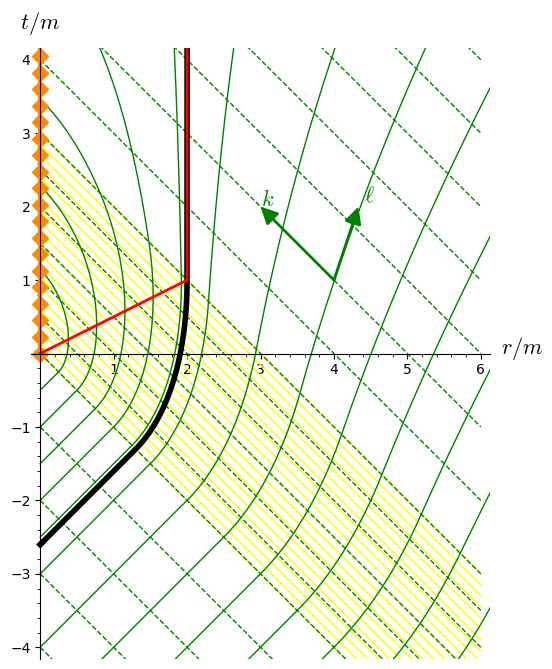

In [70]:
show(graph, aspect_ratio=1, xmax=rmax, ymin=ymin, ymax=ymax, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

In [71]:
graph.save("vai_diag_S0.pdf", aspect_ratio=1, xmax=rmax, ymin=ymin, 
           ymax=ymax, axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

A zoom on the trapping horizon in its dynamical part: notice that the "outgoing" null geodesics cross it with a vertical tangent, in agreement with the cross-sections of the trapping horizon being marginally trapped surfaces.

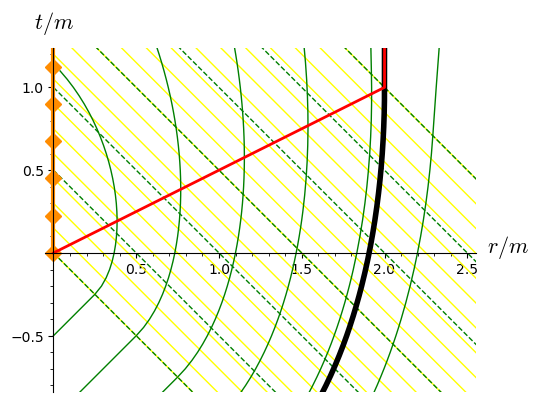

In [72]:
show(graph_wo_vectors, aspect_ratio=1, ymin=-0.8, ymax=1.2, xmax=2.5, 
     axes_labels=[r'$r/m$', r'$t/m$'])

## Case of a naked singularity

In [73]:
v0 = 20

In [74]:
m_num(v) = mS(v).subs({m_0: 1, v_0: v0})
m_num(v)

1/80*v*(sgn(v) + 1)*(sgn(-v + 20) + 1) + 1/2*sgn(v - 20) + 1/2

In [75]:
drdt1 = drdt.substitute_function(m, m_num)

fdrdt = fast_callable(drdt1, vars=[t, r])

solve_ode.rhs = fdrdt

In [76]:
tmax = v0 + 4.5
ymax = tmax - 0.5
rmax = 16

Outgoing radial null geodesics from the Minkowski region:

In [77]:
outgeods = outgeods_from_Mink(-rmax - 3, tmax, 2.)

t0 : -19, -17.0000000000000, -15.0000000000000, -13.0000000000000, -11.0000000000000, -9.00000000000000, -7.00000000000000, -5.00000000000000, -3.00000000000000, -1.00000000000000, 

Outgoing radial null geodesics in the black hole region:

In [78]:
def outgeods_in_BH(tmax):
    geods = []
    sol = solve_ode(tmax, -1, r0=1)
    geods.append(geod_line(sol))

    sol = solve_ode(2/3*tmax, -1, r0=1)
    geods.append(geod_line(sol))
    sol = solve_ode(2/3*tmax, tmax, r0=1)
    geods.append(geod_line(sol))

    sol = solve_ode(1/3*tmax, -1, r0=0.5)
    geods.append(geod_line(sol))
    sol = solve_ode(1/3*tmax, tmax, r0=0.5)
    geods.append(geod_line(sol))
    
    return geods

In [79]:
outgeods += outgeods_in_BH(tmax)

#### The Cauchy horizon (in blue):

In [80]:
if S == S0:
    a0 = 2 / v0
    rC = n(4/(1 - sqrt(1 - 8*a0)))
    tC = v0 - rC
    sol = solve_ode(tC, -1, r0=rC)
    cauchy_hor = line([(s[1], s[0]) for s in sol], 
                      color='blue', thickness=2)
    sol = solve_ode(tC, tmax, r0=rC)
    cauchy_hor += line([(s[1], s[0]) for s in sol], 
                       color='blue', thickness=2)
else:
    print("approximate CH")
    sol = solve_ode(-1.e-3, tmax, r0=1e-8)
    cauchy_hor = line([(s[1], s[0]) for s in sol], 
                      color='blue', thickness=2)

Outgoing radial null geodesics emerging from the initial singularity:

In [81]:
if S == S0:
    rB = n(4/(1 + sqrt(1 - 8*a0)))
else:
    rB = 2.5
    rC = 8.
nl = 5
dr = (rC - rB)/(nl - 1)
print("r0 : ", end='')
for i in range(nl):
    rr = rB + i*dr
    print(rr, end=', ')
    tt = v0 - rr
    sol = solve_ode(tt, -1, r0=rr)
    outgeods.append(geod_line(sol))
    sol = solve_ode(tt, tmax, r0=rr)
    outgeods.append(geod_line(sol))

r0 : 2.76393202250021, 3.88196601125011, 5.00000000000000, 6.11803398874989, 7.23606797749979, 

Drawing of the radiation region (yellow rays):

In [82]:
graph = draw_radiation_region(v0, rmax, 40)

Adding the outgoing radial null geodesics:

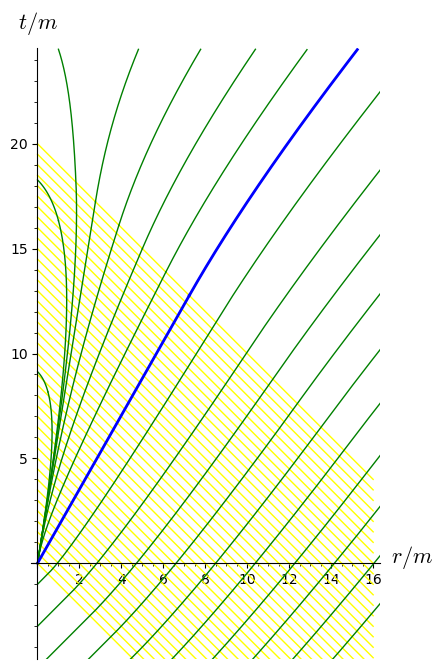

In [83]:
for geod in outgeods:
    graph += geod
graph += cauchy_hor
show(graph, aspect_ratio=1, xmax=rmax, ymin=-4, ymax=ymax, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

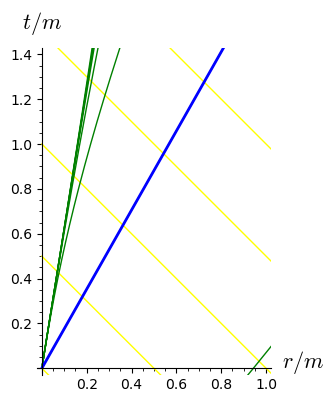

In [84]:
show(graph, aspect_ratio=1, ymin=0, ymax=1.4, xmax=1, 
     axes_labels=[r'$r/m$', r'$t/m$'])

The ingoing null geodesics:

In [85]:
ingeods = ingoing_geods(-6., tmax, rmax, v0, 2., 2.)
for geod in ingeods:
    graph += geod

#### The curvature singularity (in orange):

In [86]:
graph += curvature_sing(tmax, 21)

#### The event horizon (in black):

In [87]:
graph += event_hor(tmax)

Coordinate t at the event horizon birth [unit: m]: 
0.001000000000433674  +/-  0.001


#### The trapping horizon (in red):

In [88]:
graph += trapping_hor(m_num(v), tmax)

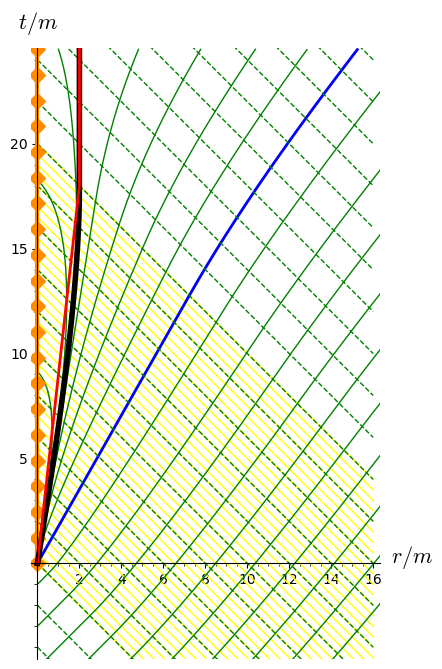

In [89]:
show(graph, aspect_ratio=1, xmax=rmax, ymin=ymin, ymax=ymax, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

In [90]:
graph.save("vai_diag_naked_S0.pdf", aspect_ratio=1, xmax=rmax, ymin=ymin, 
           ymax=ymax, axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

A zoom on the initial singularity:

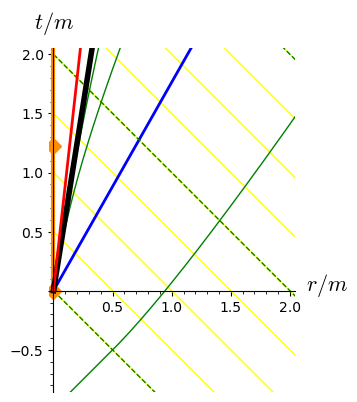

In [91]:
show(graph, aspect_ratio=1, ymin=-0.8, ymax=2, xmax=2, 
     axes_labels=[r'$r/m$', r'$t/m$'])